In [1]:
import torch
import torchaudio
import PIL.Image
import matplotlib.pyplot as plt
import einops
from IPython.display import Audio as play
from datasets import load_dataset, Audio
from torchvision.transforms.v2 import PILToTensor, ToPILImage

In [2]:
vox_celeb = load_dataset("danjacobellis/vox_celeb_v1",split='train').cast_column('opus', Audio(decode=False))
imagenet1k = load_dataset('danjacobellis/imagenet_288_webp',split='train')

Resolving data files:   0%|          | 0/66 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/66 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/66 [00:00<?, ?it/s]

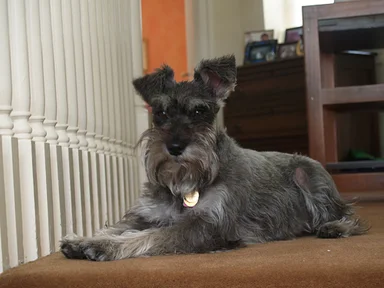

In [3]:
x_audio, fs = torchaudio.load(vox_celeb[-3]['opus']['bytes'],normalize=False);
assert fs==48000
assert x_audio.min() >= -1.0; assert x_audio.max() <= 1.0
# display(play(x_audio, rate=fs))
x_image = PILToTensor()(imagenet1k[0]['webp'])/255 - 0.5
assert x_image.min() >= -1.0; assert x_image.max() <= 1.0
assert x_image.shape[0] == 3; assert x_image.shape[1] >= 288; assert x_image.shape[2] >= 288
display(ToPILImage()(x_image+0.5))

In [ ]:
from tft.aug import stft_dropout_1d
display(play(stft_dropout_1d(x_audio),rate=48000))

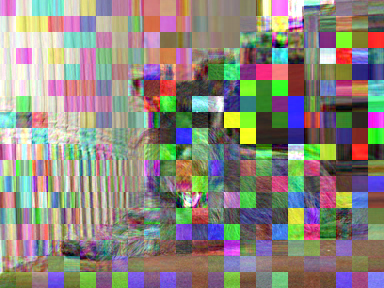

In [6]:
from tft.aug import stft_dropout_2d
display(ToPILImage()(stft_dropout_2d(x_image)+0.5))